<a href="https://colab.research.google.com/github/forneyd/MedicareReimbursement/blob/main/MedicareReimbursement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Forecasting Annual Medicare Fee-for-Service Reimbursements for Carrier Claims (2008-2010)

## Importing the libraries

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install num2words
from num2words import num2words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 980.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=7520331afbf25b8ac5227b8fd015fff2e88b6cdb3e4858617a6b348860e86d76
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


### Importing the dataset

In [41]:
df = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv')
df = df.rename(columns={'DESYNPUF_ID': 'ID', 'BENE_BIRTH_DT':'Birth_Date', 'BENE_DEATH_DT':'Death_Date', 'BENE_SEX_IDENT_CD':'Sex',
                        'BENE_RACE_CD':'RACE', 'SP_STATE_CODE':'State_Code', 'BENE_ESRD_IND':'End_Renal',
                        'BENE_HI_CVRAGE_TOT_MONS':'Total_Months_PartA', 'BENE_SMI_CVRAGE_TOT_MONS':'Total_Months_PartB',
                       'BENE_HMO_CVRAGE_TOT_MONS':'Total_Months_HMO', 'PLAN_CVRG_MOS_NUM':'Total_Months_PartD'})


In [42]:
df.isnull().sum()

ID                         0
Birth_Date                 0
Death_Date            114538
Sex                        0
RACE                       0
End_Renal                  0
State_Code                 0
BENE_COUNTY_CD             0
Total_Months_PartA         0
Total_Months_PartB         0
Total_Months_HMO           0
Total_Months_PartD         0
SP_ALZHDMTA                0
SP_CHF                     0
SP_CHRNKIDN                0
SP_CNCR                    0
SP_COPD                    0
SP_DEPRESSN                0
SP_DIABETES                0
SP_ISCHMCHT                0
SP_OSTEOPRS                0
SP_RA_OA                   0
SP_STRKETIA                0
MEDREIMB_IP                0
BENRES_IP                  0
PPPYMT_IP                  0
MEDREIMB_OP                0
BENRES_OP                  0
PPPYMT_OP                  0
MEDREIMB_CAR               0
BENRES_CAR                 0
PPPYMT_CAR                 0
dtype: int64

In [43]:
df = df.dropna()
df = df.drop('BENE_COUNTY_CD', axis=1)

In [44]:
df['End_Renal'] = df['End_Renal'].replace(['Y', 1], ['0', 0])

In [45]:
df['End_Renal']

118       0
165       0
200       0
214       0
253       0
         ..
115964    0
116007    0
116021    0
116210    0
116304    0
Name: End_Renal, Length: 1814, dtype: object

In [46]:
MEDREIMB_CAR = df.pop('MEDREIMB_CAR')
df['MEDREIMB_CAR'] = MEDREIMB_CAR

In [47]:
# Check unique values in the binary variables to understand their current representation
print(df['SP_ALZHDMTA'].unique())
print(df['SP_CHF'].unique())
print(df['SP_CHRNKIDN'].unique())
print(df['SP_CNCR'].unique())
print(df['SP_COPD'].unique())
print(df['SP_DEPRESSN'].unique())
print(df['SP_DIABETES'].unique())
print(df['SP_ISCHMCHT'].unique())
print(df['SP_OSTEOPRS'].unique())
print(df['SP_RA_OA'].unique())
print(df['SP_STRKETIA'].unique())


[2 1]
[2 1]
[2 1]
[2 1]
[2 1]
[2 1]
[1 2]
[2 1]
[2 1]
[2 1]
[2 1]


In [48]:
# Recode binary variables to 0 and 1 if they are not already encoded that way
df['Sex'] = df['Sex'].map({2 : 0, 1: 1})
df['SP_ALZHDMTA'] = df['SP_ALZHDMTA'].map({2 : 0, 1: 1})  # Replace 'No' with 0 and 'Yes' with 1
df['SP_CHF'] = df['SP_CHF'].map({2 : 0, 1: 1})  # Replace 'No' with 0 and 'Yes' with 1
df['SP_CHRNKIDN'] = df['SP_CHRNKIDN'].map({2 : 0, 1: 1})  # Replace 'No' with 0 and 'Yes' with 1
df['SP_CNCR'] = df['SP_CNCR'].map({2 : 0, 1 : 1})  # Replace 'No' with 0 and 'Yes' with 1
df['SP_COPD'] = df['SP_COPD'].map({2 : 0, 1: 1})  # Replace 'No' with 0 and 'Yes' with 1
df['SP_DEPRESSN'] = df['SP_DEPRESSN'].map({2 : 0, 1 : 1})  # Replace 'No' with 0 and 'Yes' with 1
df['SP_DIABETES'] = df['SP_DIABETES'].map({2: 0, 1: 1})  # Replace 'No' with 0 and 'Yes' with 1
df['SP_ISCHMCHT'] = df['SP_ISCHMCHT'].map({2 : 0, 1: 1})  # Replace 'No' with 0 and 'Yes' with 1
df['SP_OSTEOPRS'] = df['SP_OSTEOPRS'].map({2 : 0, 1 : 1})  # Replace 'No' with 0 and 'Yes' with 1
df['SP_RA_OA'] = df['SP_RA_OA'].map({2 : 0, 1 : 1})  # Replace 'No' with 0 and 'Yes' with 1
df['SP_STRKETIA'] = df['SP_STRKETIA'].map({2 : 0, 1 : 1})  # Replace 'No' with 0 and 'Yes' with 1

In [49]:
print(df['SP_ALZHDMTA'].unique())
print(df['SP_CHF'].unique())
print(df['SP_CHRNKIDN'].unique())
print(df['SP_CNCR'].unique())
print(df['SP_COPD'].unique())
print(df['SP_DEPRESSN'].unique())
print(df['SP_DIABETES'].unique())
print(df['SP_ISCHMCHT'].unique())
print(df['SP_OSTEOPRS'].unique())
print(df['SP_RA_OA'].unique())
print(df['SP_STRKETIA'].unique())

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]


In [50]:
print(df)

                      ID  Birth_Date  Death_Date  Sex  RACE End_Renal  \
118     0033C90574583C0D    19360801  20080901.0    0     1         0   
165     00521D781532612C    19370801  20080701.0    0     1         0   
200     00653DC86A0E30D8    19490601  20080501.0    1     3         0   
214     006D438FFACFB5FD    19200601  20080101.0    0     2         0   
253     0083EA0267C0F7CA    19351201  20080201.0    1     1         0   
...                  ...         ...         ...  ...   ...       ...   
115964  FF1496BAEFB83A73    19430801  20081001.0    0     1         0   
116007  FF2A3E47D8E28FC9    19300501  20080401.0    1     1         0   
116021  FF2F23DA05610932    19390501  20081101.0    1     1         0   
116210  FFB42FA4879051C2    19251201  20080201.0    1     1         0   
116304  FFE85BFB1FEDDC60    19200501  20080201.0    0     1         0   

        State_Code  Total_Months_PartA  Total_Months_PartB  Total_Months_HMO  \
118             49                  12     

In [51]:
patientcounts = len(df)
print(patientcounts)

1814


In [73]:
Sexcounts = df['Sex'].value_counts()
print(Sexcounts)

0    1003
1     811
Name: Sex, dtype: int64


Male = 0
Female = 1

In [ ]:
race_counts = df['RACE'].value_counts()
print(race_counts)

1 White
2 Black
3 Others
5 Hispanic

In [82]:
alz_counts = df['SP_ALZHDMTA'].value_counts()
print(alz_counts)

0    1450
1     364
Name: SP_ALZHDMTA, dtype: int64


In [83]:
chf_counts = df['SP_CHF'].value_counts()
print(chf_counts)

0    1311
1     503
Name: SP_CHF, dtype: int64


In [84]:
cncr_counts = df['SP_CNCR'].value_counts()
print(cncr_counts)

0    1694
1     120
Name: SP_CNCR, dtype: int64


In [85]:
copd_counts = df['SP_COPD'].value_counts()
print(copd_counts)

0    1568
1     246
Name: SP_COPD, dtype: int64


In [86]:
dep_counts = df['SP_DEPRESSN'].value_counts()
print(dep_counts)

0    1407
1     407
Name: SP_DEPRESSN, dtype: int64


In [87]:
diab_counts = df['SP_DIABETES'].value_counts()
print(diab_counts)

0    1137
1     677
Name: SP_DIABETES, dtype: int64


In [52]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1:].values

In [53]:
print(X)

[[0 1 '0' ... 0.0 290.0 0.0]
 [0 1 '0' ... 0.0 60.0 0.0]
 [1 3 '0' ... 0.0 0.0 0.0]
 ...
 [1 1 '0' ... 0.0 90.0 0.0]
 [1 1 '0' ... 0.0 0.0 0.0]
 [0 1 '0' ... 0.0 0.0 0.0]]


In [54]:
#One Hot Encoding categorical data
#Encoding the Independent Variables

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1, 3])], remainder='passthrough')
X = ct.fit_transform(X)

In [55]:
print(X)

[[1.0 0.0 0.0 ... 0.0 290.0 0.0]
 [1.0 0.0 0.0 ... 0.0 60.0 0.0]
 [0.0 0.0 1.0 ... 0.0 0.0 0.0]
 ...
 [1.0 0.0 0.0 ... 0.0 90.0 0.0]
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]]


In [56]:
print(y)

[[860.]
 [470.]
 [  0.]
 ...
 [120.]
 [  0.]
 [  0.]]


## Splitting the dataset into the Training set and Test set

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [58]:
print(X_test)

[[1.0 0.0 0.0 ... 0.0 360.0 60.0]
 [1.0 0.0 0.0 ... 0.0 970.0 30.0]
 [1.0 0.0 0.0 ... 0.0 280.0 0.0]
 ...
 [1.0 0.0 0.0 ... 0.0 640.0 0.0]
 [1.0 0.0 0.0 ... 0.0 1220.0 0.0]
 [1.0 0.0 0.0 ... 0.0 170.0 0.0]]


In [59]:
print(X_train)

[[0.0 1.0 0.0 ... 0.0 0.0 0.0]
 [1.0 0.0 0.0 ... 0.0 200.0 0.0]
 [1.0 0.0 0.0 ... 0.0 160.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0 40.0 0.0]
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 1.0 0.0 ... 0.0 0.0 0.0]]


In [60]:
print(y_test)

[[1270.]
 [3730.]
 [1180.]
 [ 620.]
 [   0.]
 [1000.]
 [   0.]
 [ 790.]
 [ 630.]
 [ 410.]
 [   0.]
 [   0.]
 [   0.]
 [ 500.]
 [ 100.]
 [   0.]
 [ 940.]
 [ 190.]
 [   0.]
 [1890.]
 [ 140.]
 [  10.]
 [   0.]
 [ 150.]
 [ 350.]
 [1220.]
 [ 190.]
 [2370.]
 [   0.]
 [ 160.]
 [   0.]
 [2610.]
 [  80.]
 [1050.]
 [   0.]
 [2360.]
 [ 310.]
 [2970.]
 [   0.]
 [ 180.]
 [ 590.]
 [   0.]
 [ 380.]
 [ 240.]
 [1050.]
 [ 700.]
 [  30.]
 [   0.]
 [  40.]
 [   0.]
 [ 150.]
 [   0.]
 [   0.]
 [1300.]
 [ 890.]
 [ 800.]
 [   0.]
 [ 360.]
 [   0.]
 [   0.]
 [   0.]
 [   0.]
 [   0.]
 [ 970.]
 [1370.]
 [ 690.]
 [   0.]
 [   0.]
 [ 130.]
 [1150.]
 [   0.]
 [3500.]
 [   0.]
 [1280.]
 [ 530.]
 [ 110.]
 [   0.]
 [ 740.]
 [   0.]
 [   0.]
 [   0.]
 [   0.]
 [ 210.]
 [1370.]
 [   0.]
 [  60.]
 [1710.]
 [   0.]
 [   0.]
 [4260.]
 [   0.]
 [ 250.]
 [   0.]
 [ 140.]
 [ 500.]
 [ 110.]
 [1870.]
 [ 160.]
 [ 120.]
 [   0.]
 [   0.]
 [   0.]
 [1020.]
 [ 190.]
 [1400.]
 [   0.]
 [   0.]
 [   0.]
 [ 130.]
 [ 150.]
 [ 100.]
 

## Training the Multiple Linear Regression model on the Training set

In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predicting the Test set results

In [62]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1.24e+03  1.27e+03]
 [ 3.60e+03  3.73e+03]
 [ 1.07e+03  1.18e+03]
 [ 7.42e+02  6.20e+02]
 [-8.59e+01  0.00e+00]
 [ 1.04e+03  1.00e+03]
 [ 4.29e+01  0.00e+00]
 [ 9.59e+02  7.90e+02]
 [ 4.33e+02  6.30e+02]
 [ 5.18e+02  4.10e+02]
 [ 4.44e+01  0.00e+00]
 [ 3.25e+01  0.00e+00]
 [-5.36e+01  0.00e+00]
 [ 1.60e+02  5.00e+02]
 [ 1.16e+02  1.00e+02]
 [ 4.32e+01  0.00e+00]
 [ 1.27e+03  9.40e+02]
 [ 6.02e+01  1.90e+02]
 [-7.54e+00  0.00e+00]
 [ 1.58e+03  1.89e+03]
 [ 1.19e+02  1.40e+02]
 [ 9.30e+01  1.00e+01]
 [ 9.37e+01  0.00e+00]
 [ 9.37e+01  1.50e+02]
 [ 2.41e+02  3.50e+02]
 [ 8.08e+02  1.22e+03]
 [ 2.19e+02  1.90e+02]
 [ 3.19e+03  2.37e+03]
 [ 3.37e+01  0.00e+00]
 [ 2.10e+02  1.60e+02]
 [ 3.52e+01  0.00e+00]
 [ 3.13e+03  2.61e+03]
 [ 1.68e+02  8.00e+01]
 [ 4.70e+02  1.05e+03]
 [-3.39e+00  0.00e+00]
 [ 1.57e+03  2.36e+03]
 [ 1.81e+02  3.10e+02]
 [ 2.93e+03  2.97e+03]
 [ 1.39e+00  0.00e+00]
 [ 3.19e+02  1.80e+02]
 [ 6.45e+02  5.90e+02]
 [-3.51e+00  0.00e+00]
 [ 3.72e+02  3.80e+02]
 [ 2.43e+01

### Evaluating the Model Performance

In [63]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9171065105973446

### Visualising the Test set results

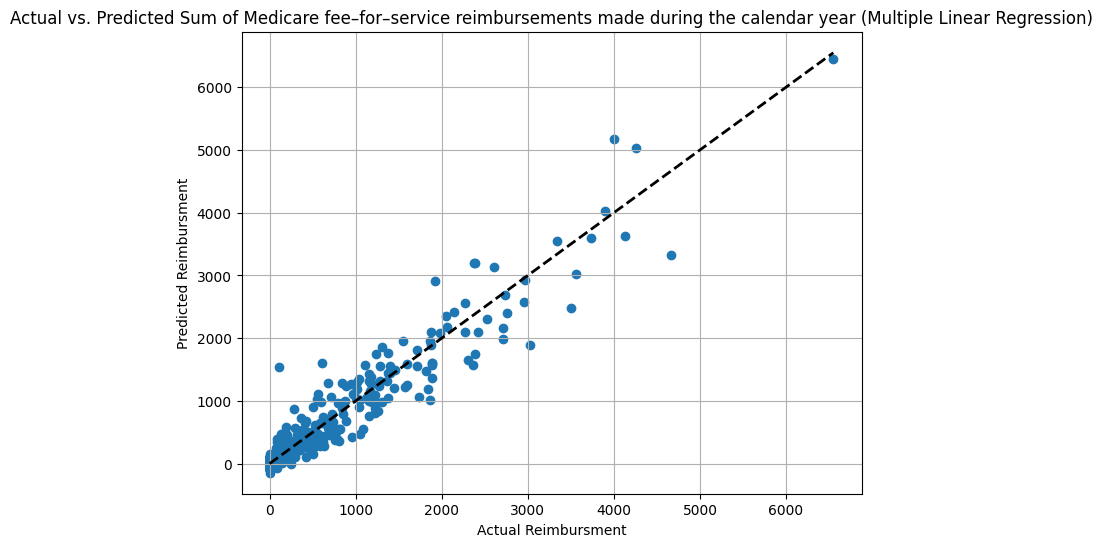

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Reimbursment')
plt.ylabel('Predicted Reimbursment')
plt.title('Actual vs. Predicted Sum of Medicare fee–for–service reimbursements made during the calendar year (Multiple Linear Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.grid(True)
plt.show()

#### This plot compares the actual reimbursements (x-axis) to the predicted reimbursements (y-axis) for the Medicare fee-for-service claims. Ideally, the points should align along a diagonal line (y=x), indicating that predicted values closely match the actual values. If the points mostly cluster around the line, it suggests that the model is making accurate predictions. Dispersed or spread-out points away from the line may indicate discrepancies between actual and predicted values.

## Training the Random Forest Regression model on the whole dataset

In [65]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
RFregressor.fit(X_train, y_train)

<ipython-input-65-af5cccb35651>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFregressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

### Predicting the Test set results

In [95]:
y_pred_rf = RFregressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_rf.reshape(len(y_pred_rf),1), y_test.reshape(len(y_test),1)),1))

[[1.44e+03 1.27e+03]
 [3.74e+03 3.73e+03]
 [8.62e+02 1.18e+03]
 [8.56e+02 6.20e+02]
 [0.00e+00 0.00e+00]
 [9.24e+02 1.00e+03]
 [0.00e+00 0.00e+00]
 [1.24e+03 7.90e+02]
 [2.61e+02 6.30e+02]
 [4.15e+02 4.10e+02]
 [0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00]
 [2.03e+02 5.00e+02]
 [9.10e+01 1.00e+02]
 [0.00e+00 0.00e+00]
 [1.30e+03 9.40e+02]
 [1.23e+02 1.90e+02]
 [0.00e+00 0.00e+00]
 [1.70e+03 1.89e+03]
 [1.42e+02 1.40e+02]
 [1.00e+01 1.00e+01]
 [4.86e+00 0.00e+00]
 [1.17e+02 1.50e+02]
 [4.56e+02 3.50e+02]
 [7.88e+02 1.22e+03]
 [1.28e+02 1.90e+02]
 [3.00e+03 2.37e+03]
 [0.00e+00 0.00e+00]
 [2.48e+02 1.60e+02]
 [0.00e+00 0.00e+00]
 [3.52e+03 2.61e+03]
 [1.20e+02 8.00e+01]
 [4.55e+02 1.05e+03]
 [0.00e+00 0.00e+00]
 [1.34e+03 2.36e+03]
 [3.15e+02 3.10e+02]
 [2.90e+03 2.97e+03]
 [0.00e+00 0.00e+00]
 [3.42e+02 1.80e+02]
 [4.80e+02 5.90e+02]
 [0.00e+00 0.00e+00]
 [2.85e+02 3.80e+02]
 [1.32e+02 2.40e+02]
 [9.71e+02 1.05e+03]
 [8.82e+02 7.00e+02]
 [1.20e+01 3.00e+01]
 [0.00e+00 0.

### Evaluating the Model Performance

In [96]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_rf)

0.9024199038047211

### Visualize Random Forest Model

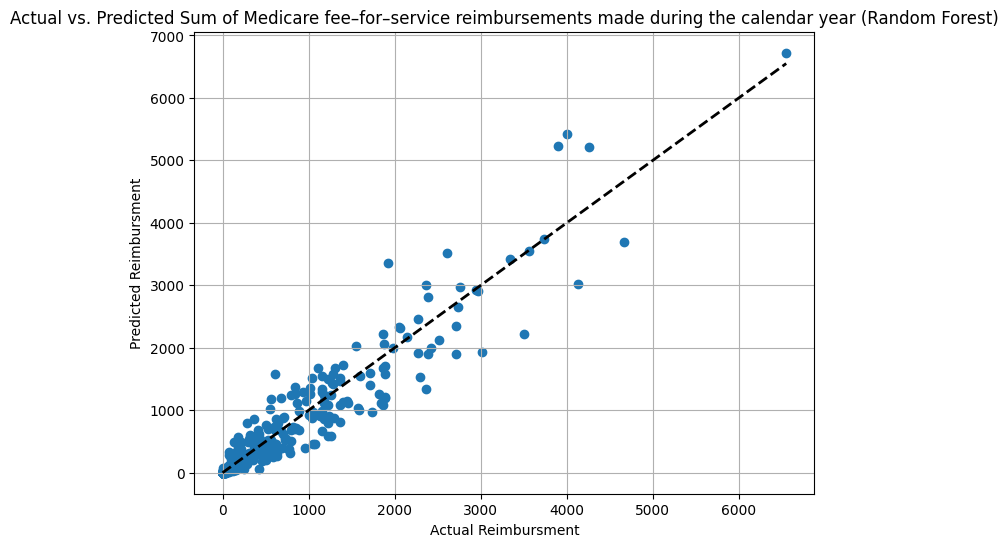

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Reimbursment')
plt.ylabel('Predicted Reimbursment')
plt.title('Actual vs. Predicted Sum of Medicare fee–for–service reimbursements made during the calendar year (Random Forest)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.grid(True)
plt.show()

## Training the XG Boost model on the whole dataset

In [69]:
import xgboost as xgb
xmodel = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100) # Adjust hyperparameters as needed
xmodel.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

### Predicting the Test set results

In [98]:
y_pred_x = xmodel.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_x.reshape(len(y_pred_x),1), y_test.reshape(len(y_test),1)),1))

[[ 2.08e+03  1.27e+03]
 [ 3.49e+03  3.73e+03]
 [ 9.00e+02  1.18e+03]
 [ 5.31e+02  6.20e+02]
 [-6.76e+00  0.00e+00]
 [ 8.68e+02  1.00e+03]
 [-2.76e+01  0.00e+00]
 [ 1.18e+03  7.90e+02]
 [ 4.02e+02  6.30e+02]
 [ 3.66e+02  4.10e+02]
 [ 3.42e+01  0.00e+00]
 [ 5.41e+00  0.00e+00]
 [ 9.10e-01  0.00e+00]
 [ 1.66e+02  5.00e+02]
 [ 3.46e+02  1.00e+02]
 [ 5.11e-01  0.00e+00]
 [ 1.22e+03  9.40e+02]
 [ 1.19e+02  1.90e+02]
 [ 1.26e+01  0.00e+00]
 [ 1.75e+03  1.89e+03]
 [ 1.41e+02  1.40e+02]
 [ 2.56e+02  1.00e+01]
 [ 1.81e-01  0.00e+00]
 [ 1.12e+02  1.50e+02]
 [ 2.74e+02  3.50e+02]
 [ 6.32e+02  1.22e+03]
 [ 1.28e+02  1.90e+02]
 [ 3.23e+03  2.37e+03]
 [ 3.06e+00  0.00e+00]
 [ 1.62e+02  1.60e+02]
 [ 3.95e+00  0.00e+00]
 [ 3.26e+03  2.61e+03]
 [ 6.60e+01  8.00e+01]
 [ 6.27e+02  1.05e+03]
 [ 1.80e+01  0.00e+00]
 [ 1.56e+03  2.36e+03]
 [ 4.91e+02  3.10e+02]
 [ 2.75e+03  2.97e+03]
 [ 2.27e+01  0.00e+00]
 [ 4.36e+02  1.80e+02]
 [ 7.19e+02  5.90e+02]
 [ 7.43e+01  0.00e+00]
 [ 2.76e+02  3.80e+02]
 [ 1.73e+02

### Evaulate the XG Boost Model

In [99]:
r2_score(y_test, y_pred_x)

0.8903923938014114

### Visualize XG Boost Model

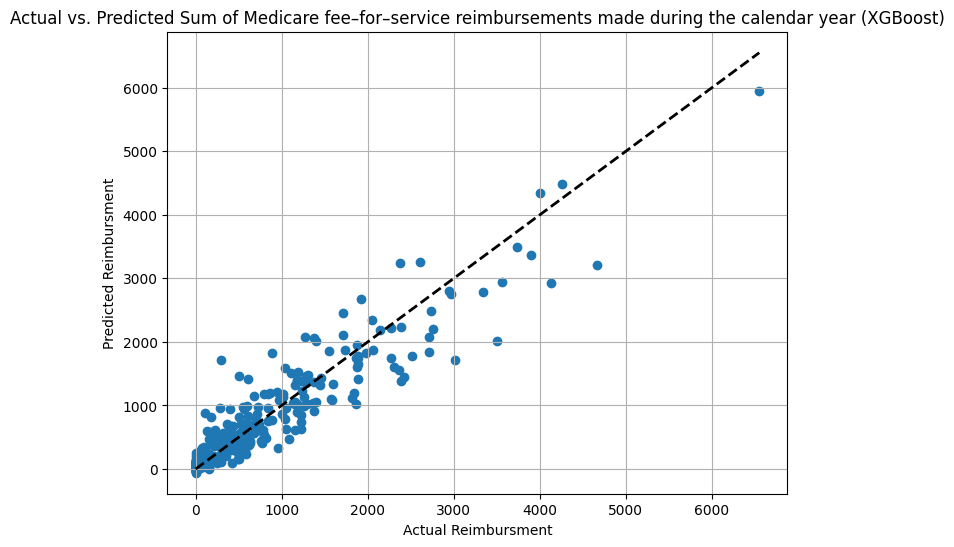

In [100]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_x)
plt.xlabel('Actual Reimbursment')
plt.ylabel('Predicted Reimbursment')
plt.title('Actual vs. Predicted Sum of Medicare fee–for–service reimbursements made during the calendar year (XGBoost)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.grid(True)
plt.show()